In [1]:
import anndata as ad
import scanpy as sc
import scvi
import os
import pandas as pd
import numpy as np
import scarches as sca
os.chdir('/lustre/scratch126/cellgen/team297/bs16/current_projects/kidney_glomTI_response/code')
import useful_functions as uf
import sys
print(sys.executable)
import gdown
import torch
import warnings
#warnings
warnings.simplefilter(action='ignore')
#figures
sc.set_figure_params(frameon=False, figsize=(4, 4), dpi=150, fontsize = 5)
#set seeds for reproducibility
scvi.settings.seed = 100
#torch
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

from datetime import datetime
print(datetime.now(tz=None))

Global seed set to 0
/home/jovyan/my-conda-envs/myenv/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/jovyan/my-conda-envs/myenv/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)
/home/jovyan/my-conda-envs/myenv/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Convers

/home/jovyan/my-conda-envs/myenv/bin/python


Global seed set to 100


2023-12-15 12:32:14.469908


In [2]:
import warnings
warnings.filterwarnings('ignore')
#this will hide the awful pandas deprec warnings that are currently plaguing scanpy

#now print versions
print(sc.__version__)
print(ad.__version__)
print(scvi.__version__)
print(pd.__version__)
print(np.__version__)
print(sca.__version__)
print(torch.__version__)

1.9.1
0.8.0
0.19.0
1.5.1
1.22.4
0.5.6
1.13.0+cu117


In [44]:
##### nuclei
os.chdir('/lustre/scratch126/cellgen/team297/bs16/current_projects/kidney_glomTI_response')
joint_nuclei = sc.read_h5ad("data/trained/public_data/lake_nuclei/adata.h5ad")

In [45]:
scvi_lake_nuclei = joint_nuclei[joint_nuclei.obs.dataset.isin(["lake"])].obsm['X_scVI']
scvi_stewart_nuclei= joint_nuclei[joint_nuclei.obs.dataset.isin(["stewart"])].obsm['X_scVI']
stewart_nuclei_adata = sc.read_h5ad("./data/annotated/multiome_adata.h5ad")
lake_nuclei_adata = sc.read_h5ad("./data/public_data/lake_2023/lake_SNrnaseq.h5ad")
lake_nuclei_adata.obsm['X_joint_scVI'] = scvi_lake_nuclei
stewart_nuclei_adata.obsm['X_joint_scVI'] = scvi_stewart_nuclei

In [46]:
#fit for cell type
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(lake_nuclei_adata.obsm['X_joint_scVI'],lake_nuclei_adata.obs['subclass.full'])

KNeighborsClassifier(n_neighbors=30)

In [47]:
nuc_predictions = neigh.predict(stewart_nuclei_adata.obsm['X_joint_scVI'] )

In [48]:
pd.Series(nuc_predictions, index = stewart_nuclei_adata.obs.index).to_csv("./data/knn_predictions/nuclei_celltype_predictions.csv")

In [49]:
stewart_nuclei_adata.obs['lake_predict'] = nuc_predictions

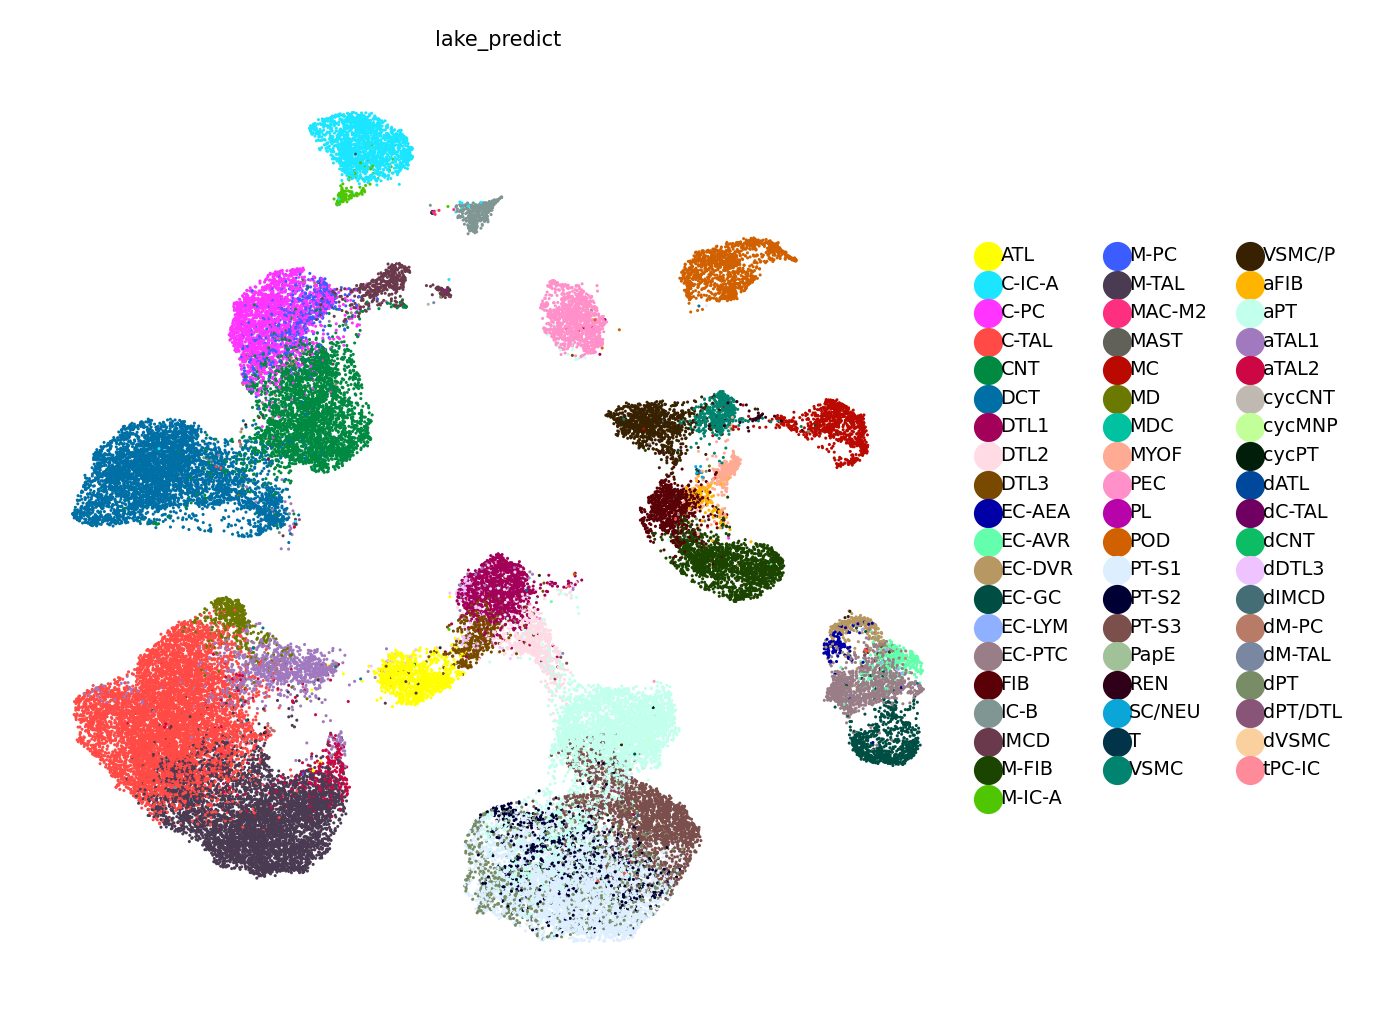

In [50]:
sc.pl.umap(stewart_nuclei_adata, color = 'lake_predict')

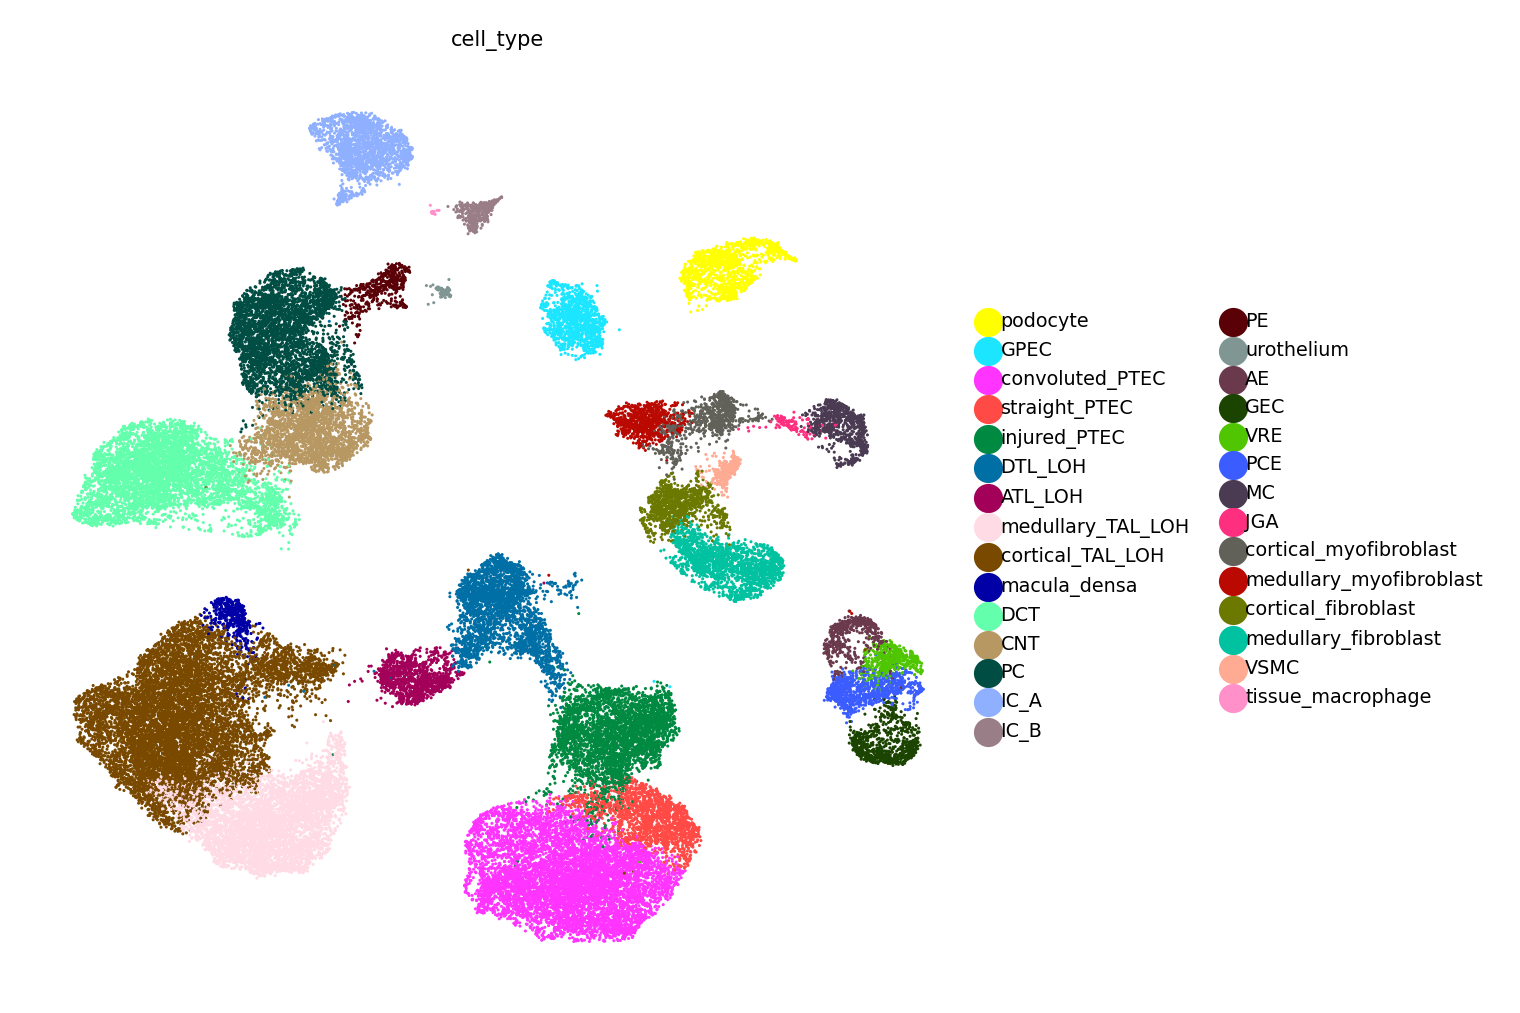

In [51]:
sc.pl.umap(stewart_nuclei_adata, color = 'cell_type')

In [ ]:
#fit for region
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(lake_nuclei_adata.obsm['X_joint_scVI'],lake_nuclei_adata.obs['region.l1'])

In [ ]:
nuc_predictions = neigh.predict(stewart_nuclei_adata.obsm['X_joint_scVI'] )

In [ ]:
pd.Series(nuc_predictions, index = stewart_nuclei_adata.obs.index).to_csv("./data/knn_predictions/nuclei_region_predictions.csv")

In [ ]:
stewart_nuclei_adata.obs['lake_region_predict'] = nuc_predictions
sc.pl.umap(stewart_nuclei_adata, color = 'lake_region_predict', save = 'lake_nuclei_region_predict.pdf')

In [ ]:
#fit for ref/altered
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(lake_nuclei_adata.obsm['X_joint_scVI'],lake_nuclei_adata.obs['state.l1'])

In [ ]:
nuc_predictions = neigh.predict(stewart_nuclei_adata.obsm['X_joint_scVI'] )

In [ ]:
pd.Series(nuc_predictions, index = stewart_nuclei_adata.obs.index).to_csv("./data/knn_predictions/nuclei_state_predictions.csv")

In [ ]:
stewart_nuclei_adata.obs['lake_state_predict'] = nuc_predictions
sc.pl.umap(stewart_nuclei_adata, color = 'lake_state_predict',  save = 'lake_nuclei_state_predict.pdf')

In [ ]:
#fit for structure
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(lake_nuclei_adata.obsm['X_joint_scVI'],lake_nuclei_adata.obs['structure'])


In [ ]:
nuc_predictions = neigh.predict(stewart_nuclei_adata.obsm['X_joint_scVI'] )

In [ ]:
pd.Series(nuc_predictions, index = stewart_nuclei_adata.obs.index).to_csv("./data/knn_predictions/nuclei_structure_predictions.csv")

In [ ]:
stewart_nuclei_adata.obs['lake_structure_predict'] = nuc_predictions
sc.pl.umap(stewart_nuclei_adata, color = 'lake_structure_predict', save = 'lake_nuclei_structure_predict.pdf')

In [3]:
##### cells
os.chdir('/lustre/scratch126/cellgen/team297/bs16/current_projects/kidney_glomTI_response')
joint_cells = sc.read_h5ad("data/trained/public_data/lake_cells/adata.h5ad")

In [4]:
scvi_lake_cells = joint_cells[joint_cells.obs.dataset.isin(["lake"])].obsm['X_scVI']
scvi_stewart_cells = joint_cells[joint_cells.obs.dataset.isin(["stewart"])].obsm['X_scVI']
stewart_cells_adata = sc.read_h5ad("./data/annotated/scRNAseq_glom_TI_kidney.h5ad")
lake_cell_adata = sc.read_h5ad("./data/public_data/lake_2023/lake_SCrnaseq.h5ad")
lake_cell_adata.obsm['X_joint_scVI'] = scvi_lake_cells
stewart_cells_adata.obsm['X_joint_scVI'] = scvi_stewart_cells

In [52]:
#fit for cell type
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(lake_cell_adata.obsm['X_joint_scVI'],lake_cell_adata.obs['subclass.full'])

KNeighborsClassifier(n_neighbors=15)

In [53]:
cell_predictions = neigh.predict(stewart_cells_adata.obsm['X_joint_scVI'] )

In [54]:
pd.Series(cell_predictions, index = stewart_cells_adata.obs.index).to_csv("./data/knn_predictions/cell_celltype_predictions.csv")

In [55]:
stewart_cells_adata.obs['lake_predict'] = cell_predictions

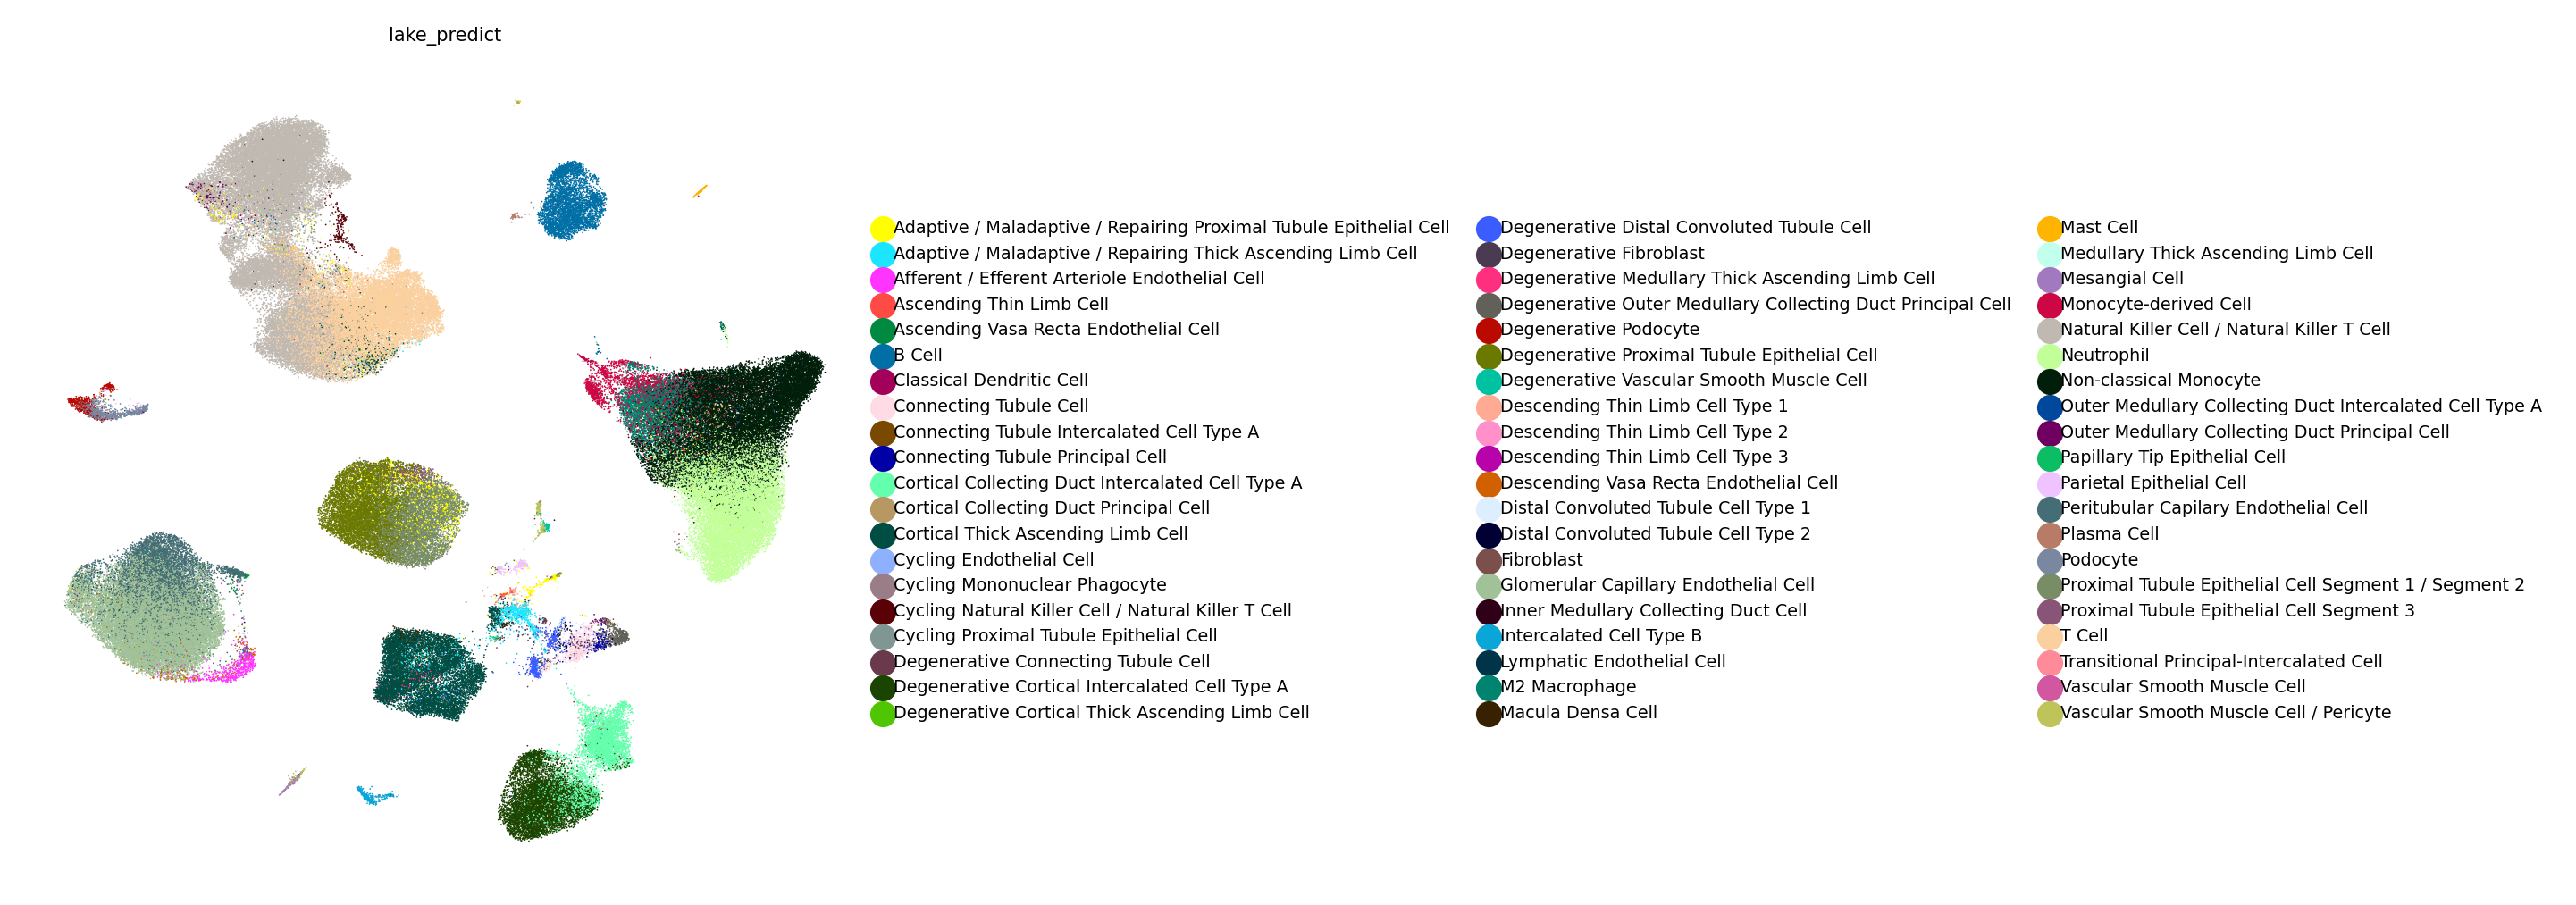

In [56]:
sc.pl.umap(stewart_cells_adata, color = 'lake_predict')

In [20]:
#fit for region
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(lake_cell_adata.obsm['X_joint_scVI'],lake_cell_adata.obs['state'])

KNeighborsClassifier(n_neighbors=15)

In [21]:
cell_predictions = neigh.predict(stewart_cells_adata.obsm['X_joint_scVI'] )

In [22]:
pd.Series(cell_predictions, index = stewart_cells_adata.obs.index).to_csv("./data/knn_predictions/cell_state_predictions.csv")

In [23]:
stewart_cells_adata.obs['lake_state_predict'] = cell_predictions

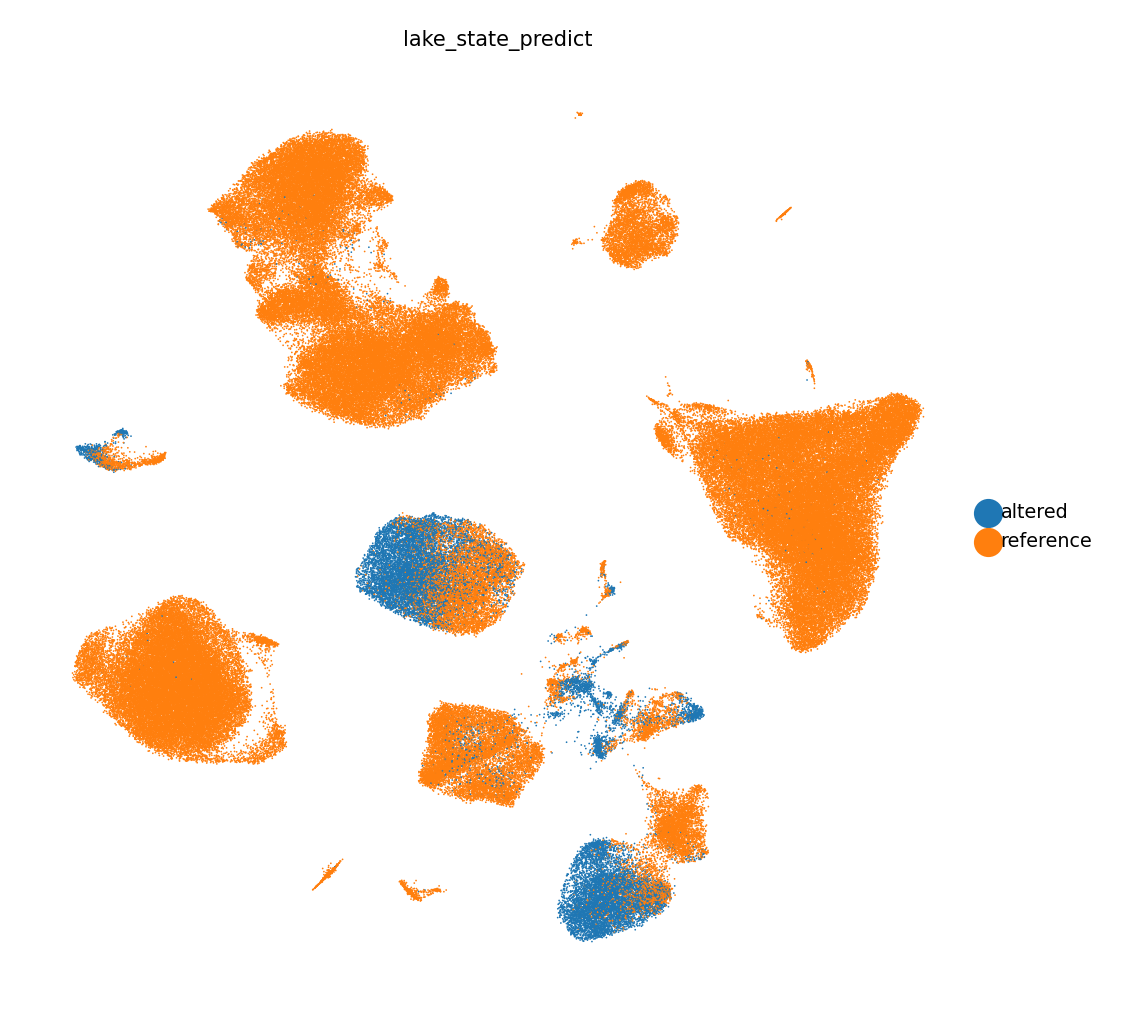

In [57]:
sc.pl.umap(stewart_cells_adata, color = 'lake_state_predict', save = 'cells_umap_state.pdf')